# Title :
Objective / Hypothesis: 
Author: 
Date: 


### Initiation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df_AirBnp_listing = pd.read_csv('listings.csv', delimiter=',')

In [147]:
df_AirBnp_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7769 entries, 0 to 7768
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 6.3+ MB


In [150]:
set(df_AirBnp_listing.columns)

{'access',
 'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'first_review',
 'guests_included',
 'has_availability',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'house_rules',
 'id',
 'instan

In [155]:
df_AirBnp_listing[['amenities', 'cleaning_fee', 'extra_people']].head()

,amenities,cleaning_fee,extra_people
0,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...","$1,000.00",$500.00
1,"{TV,Wifi,Kitchen,Elevator}",NaN,$0.00
2,"{TV,Internet,Wifi,Elevator,""Buzzer/wireless in...",NaN,$0.00
3,"{Wifi,Breakfast,Elevator,""Buzzer/wireless inte...",NaN,$200.00
4,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,Was...",NaN,$0.00


In [154]:
df_AirBnp_listing['experiences_offered'].unique()
df_AirBnp_listing['extra_people'].unique()

array(['none'], dtype=object)

In [4]:
df_new = df_AirBnp_listing[['room_type', 
'accommodates',
'bedrooms',
'bathrooms',
'price',
'name',
'host_since',
'host_response_time',
'property_type',
'review_scores_value',
'square_feet',
'cancellation_policy',
'host_is_superhost',                            
'neighbourhood',
'instant_bookable',
'extra_people',
'experiences_offered'
                           ]]

In [5]:
df_new.dtypes

room_type               object
accommodates             int64
bedrooms               float64
bathrooms              float64
price                   object
name                    object
host_since              object
host_response_time      object
property_type           object
review_scores_value    float64
square_feet            float64
cancellation_policy     object
host_is_superhost       object
neighbourhood           object
instant_bookable        object
dtype: object

In [6]:
df_new['neighbourhood'].fillna(value=0, inplace=True)

/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [7]:
df_new['neighbourhood'].unique()

array(['Skarpnäck', 'Södermalm', 'Norrmalm', 'Kungsholmen',
       'Rinkeby-Kista', 'Farsta', 'Älvsjö', 'Östermalm',
       'Enskede-Årsta-Vantör', 'Hägersten-Liljeholmen', 'Bromma',
       'Skärholmen', 'Hässelby-Vällingby', 'Spånga-Tensta', 0],
      dtype=object)

## Starts with EDA

* Convert host_since to date and time
* Retrive year, month, day, day of week and season from the date
* Using get dummies convery categorical values in columns for analysis
* Convert Price from object to numeric


In [8]:

df_new['host_since'] = df_new['host_since'].apply(lambda x:  pd.to_datetime(x))
df_new['Year'] = df_new['host_since'].apply(lambda x: x.year)
df_new['Month'] = df_new['host_since'].apply(lambda x: x.month)
df_new['day'] = df_new['host_since'].apply(lambda x: x.day)
df_new['weekday'] = df_new['host_since'].apply(lambda x: x.weekday())
df_new['weekday_name'] = df_new['host_since'].apply(lambda x: x.day_name())

df_new['square_feet'].fillna(value=0, inplace=True)
df_new['review_scores_value'].fillna(value=0, inplace=True)
df_new['host_response_time'].fillna(value=0, inplace=True)
df_new['host_is_superhost'].fillna(value=0, inplace=True)
df_new['neighbourhood'].fillna(value=0, inplace=True)


df_new['price'] = df_new.price.str.replace('$', '')
df_new['price'] = df_new.price.str.replace(',', '').astype(float)
#df_new['price'] = df_new['price'].astype(str).astype(float)

/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [9]:
def superhost(check):
    if check=='t':
        return 1
    elif check=='f':
        return 0
    else:
        return check

df_new['host_is_superhost'] = df_new['host_is_superhost'].apply(lambda x: superhost(x))
df_new['instant_bookable'] = df_new['instant_bookable'].apply(lambda x: superhost(x))


/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [10]:
def season(mnth):
    if mnth in (12, 1, 2):
        return 'Winter'
    elif mnth in (3,4,5):
        return 'Spring'
    elif mnth in (6,7,8):
        return 'Summer'
    else:
        return 'Autumn'

df_new['Season'] = df_new['Month'].apply(lambda x: season(x))

/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [11]:
df_new.dtypes

room_type                      object
accommodates                    int64
bedrooms                      float64
bathrooms                     float64
price                         float64
name                           object
host_since             datetime64[ns]
host_response_time             object
property_type                  object
review_scores_value           float64
square_feet                   float64
cancellation_policy            object
host_is_superhost               int64
neighbourhood                  object
instant_bookable                int64
Year                          float64
Month                         float64
day                           float64
weekday                       float64
weekday_name                   object
Season                         object
dtype: object

In [12]:
df_new.head(1)

,room_type,accommodates,bedrooms,bathrooms,price,name,host_since,host_response_time,property_type,review_scores_value,...,cancellation_policy,host_is_superhost,neighbourhood,instant_bookable,Year,Month,day,weekday,weekday_name,Season
0,Entire home/apt,3,2.0,1.0,1197.0,"Stockholm, new spacoius villa",2011-06-26,within a few hours,House,0.0,...,moderate,0,Skarpnäck,0,2011.0,6.0,26.0,6.0,Sunday,Summer


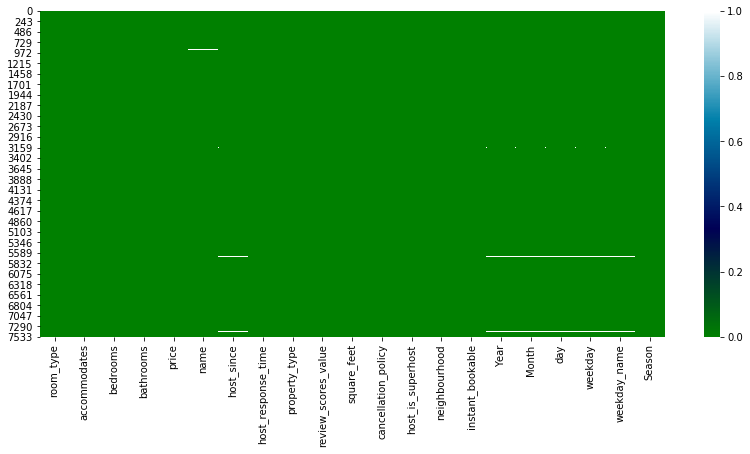

In [13]:
plt.figure(figsize=(14,6))
sns.heatmap(df_new.isna(), cmap='ocean')

In [14]:
df_new.dropna(inplace=True)

/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


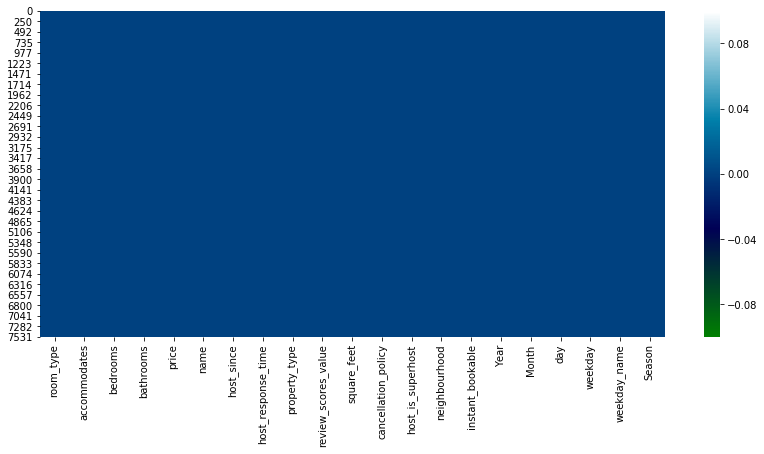

In [15]:
plt.figure(figsize=(14,6))
sns.heatmap(df_new.isna(), cmap='ocean')

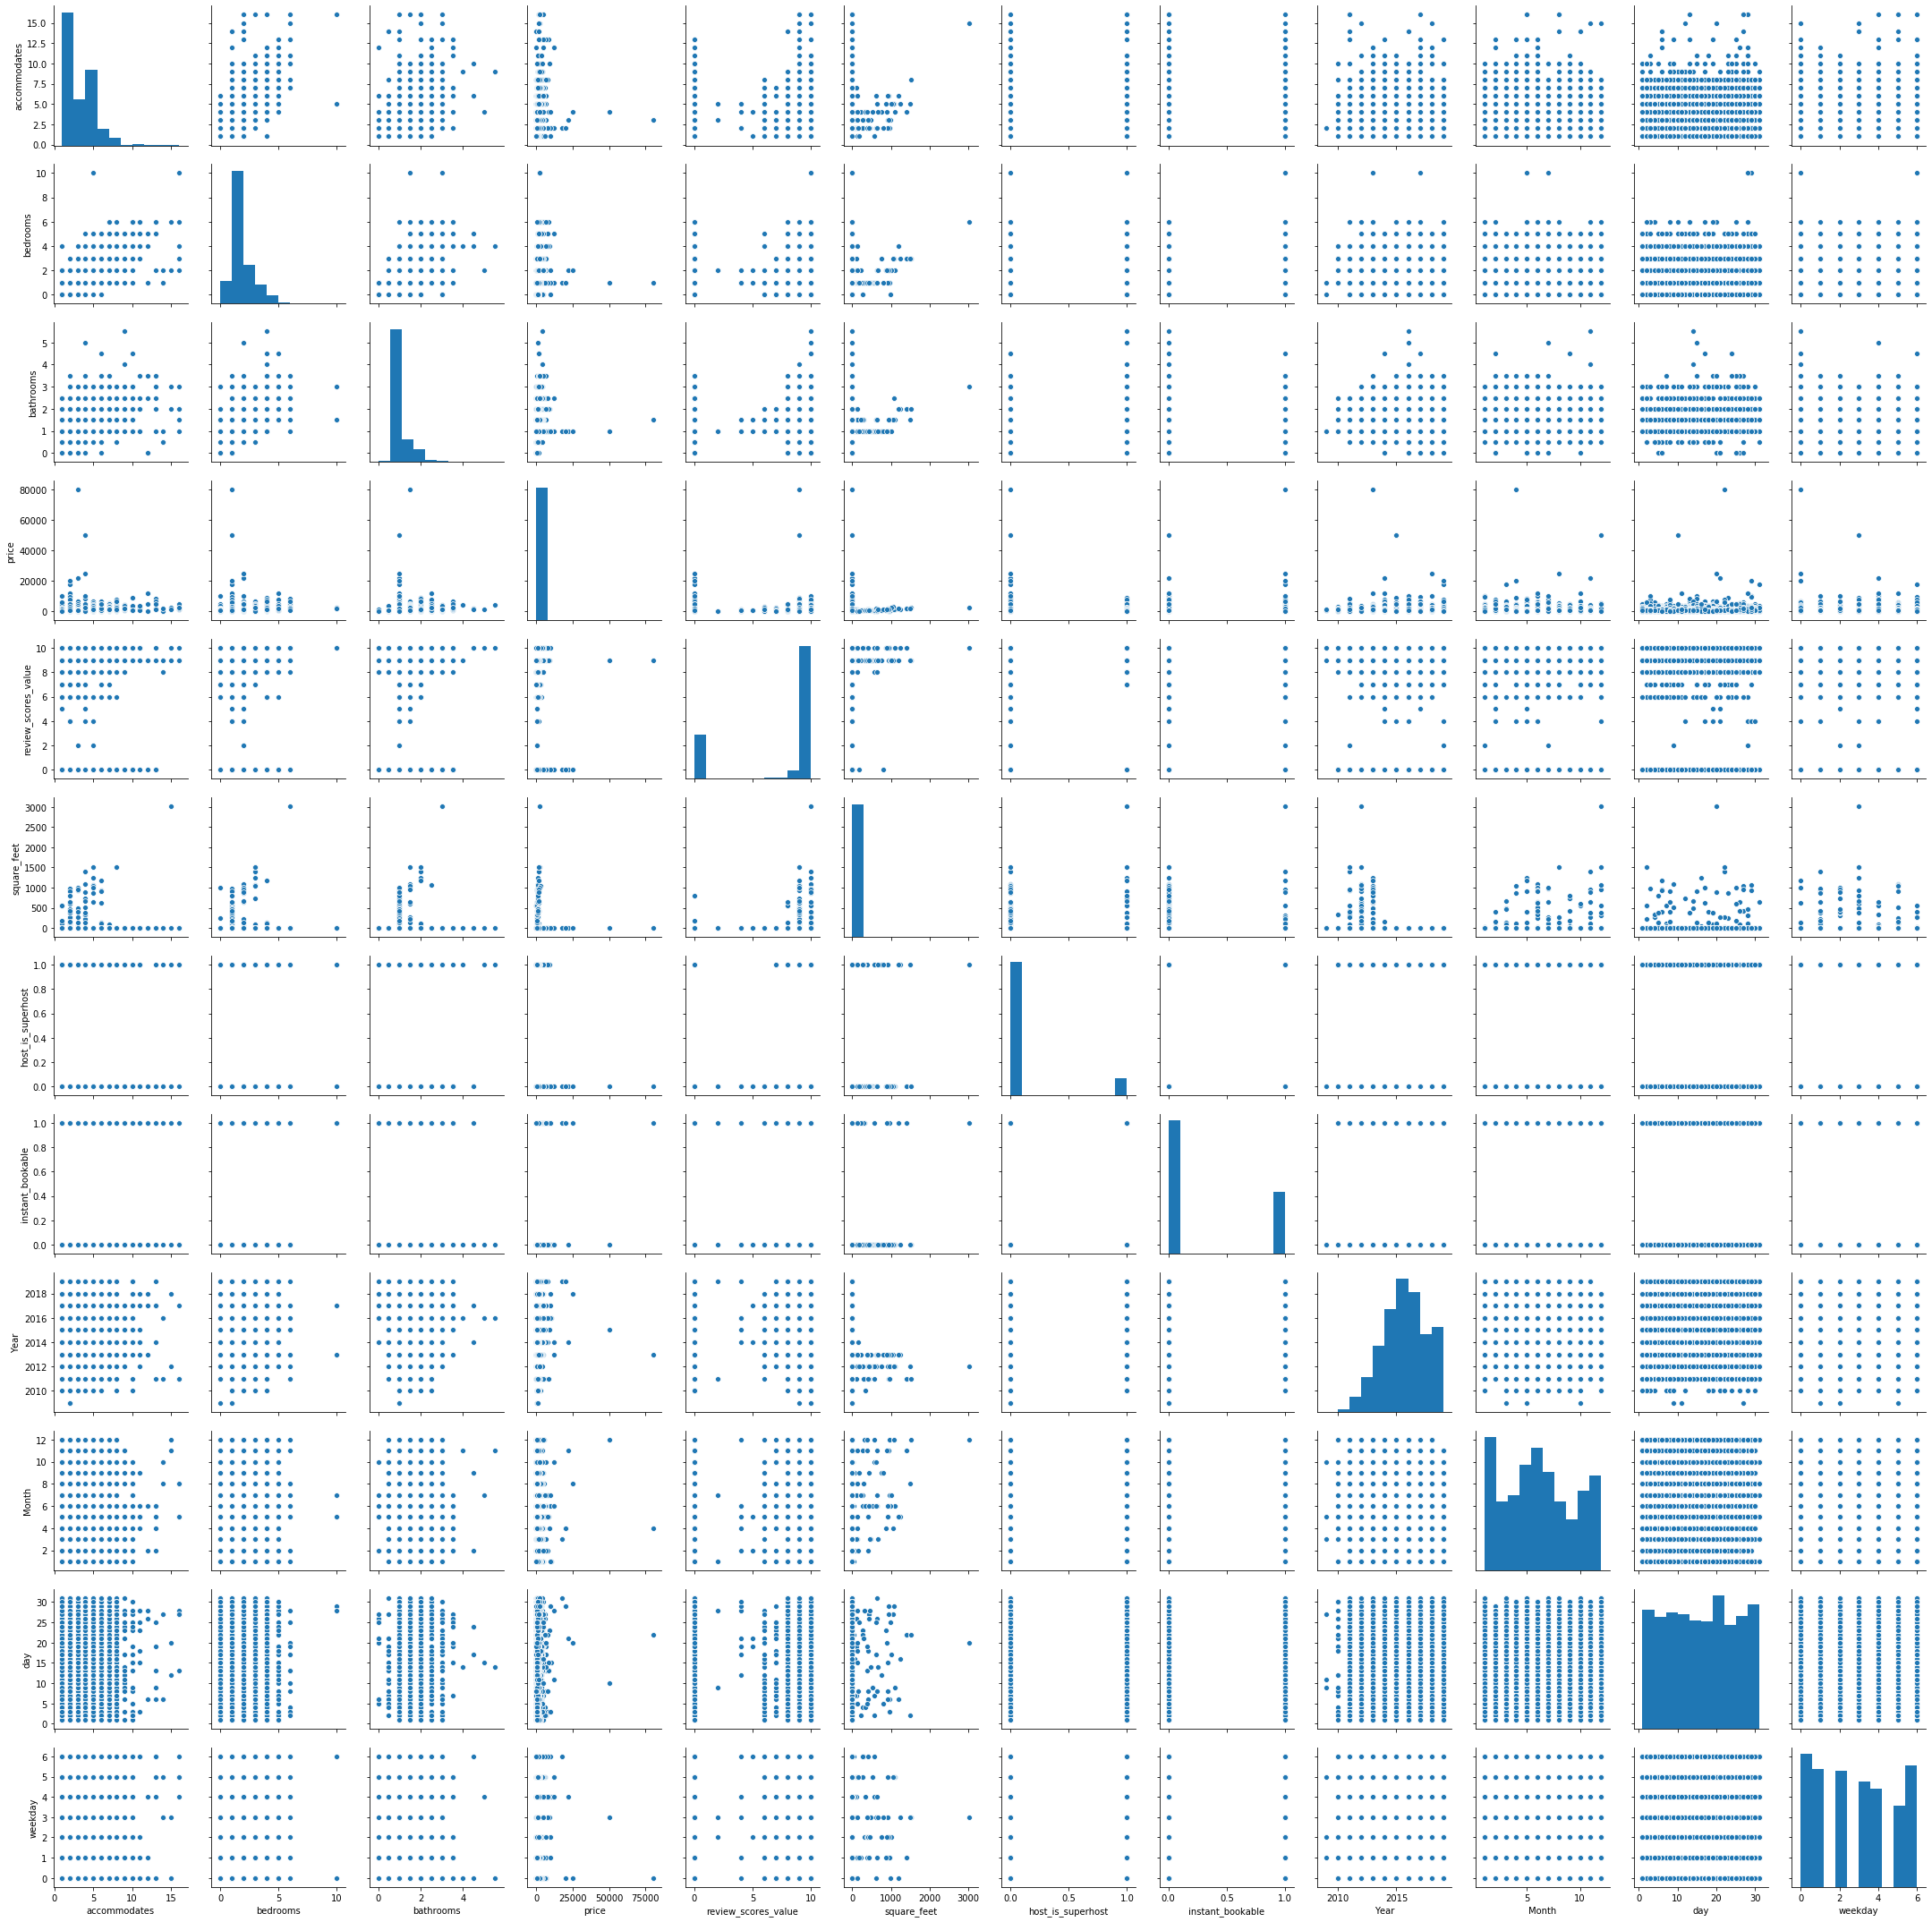

In [16]:
sns.pairplot(df_new)

In [17]:
df_new['price'].describe()

count     7705.000000
mean      1095.532511
std       1391.455741
min         96.000000
25%        632.000000
50%        900.000000
75%       1254.000000
max      80001.000000
Name: price, dtype: float64

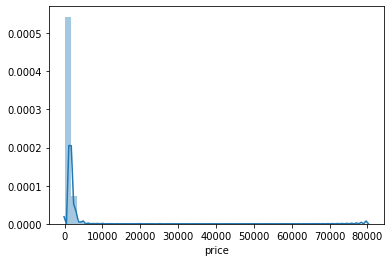

In [18]:
sns.distplot(df_new['price'])

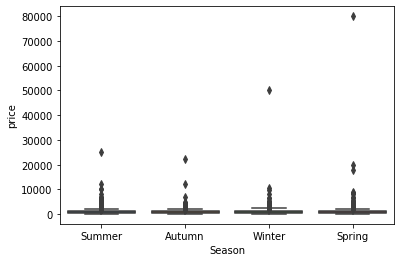

In [19]:
sns.boxplot(x='Season', y ='price', data=df_new)

### Above boxplot stats high variation, it could also be a case of bad data quality
### need to remove the values above max value (mean + STD)

In [20]:
a = np.floor(df_new['price'].mean() + df_new['price'].std())
a

2486.0

In [21]:
df_new[df_new['price'] > np.floor(df_new['price'].mean() + df_new['price'].std())]['price'].count()

393

In [22]:
#df_new.drop(df_new[df_new['price']>np.floor(df_new['price'].mean() + df_new['price'].std())].index, inplace=True)

df_new.drop(df_new[df_new['price']>a].index, inplace=True)

/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### we should again check mean and std dev and box plt

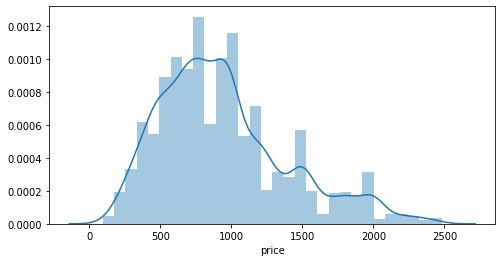

In [25]:
plt.figure(figsize=(8,4))
sns.distplot(df_new['price'], bins=30)

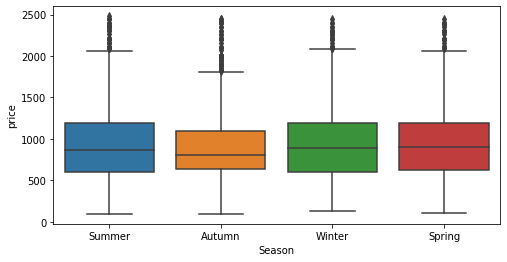

In [26]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Season', y ='price', data=df_new)

In [27]:
df_new['room_type'].value_counts()

Entire home/apt    5990
Private room       1213
Shared room          55
Hotel room           54
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Room Type ~ Count')

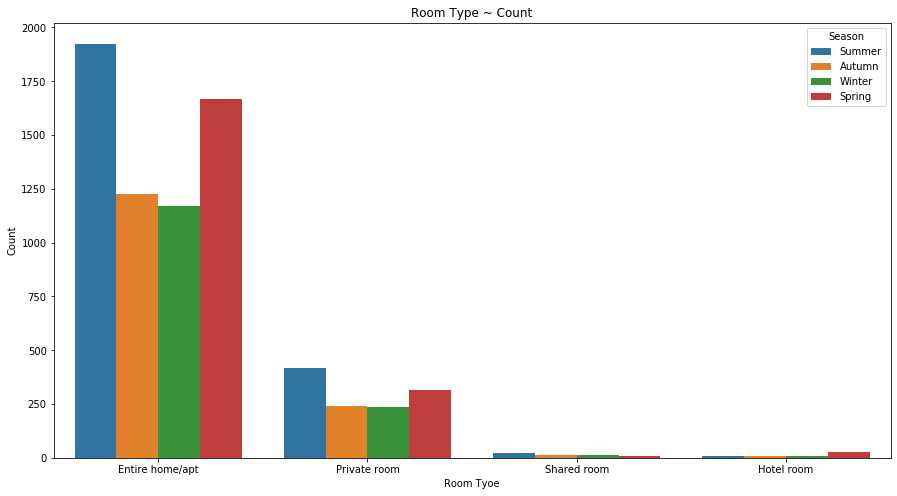

In [28]:
plt.figure(figsize=(15,8))
#sns.boxplot(x='Season', y ='price', data=df_new, hue='room_type')
sns.countplot(x='room_type', data=df_new, hue='Season')
plt.xlabel("Room Tyoe")
plt.ylabel("Count")
plt.title("Room Type ~ Count")

Text(0.5, 1.0, 'Season ~ Room Type')

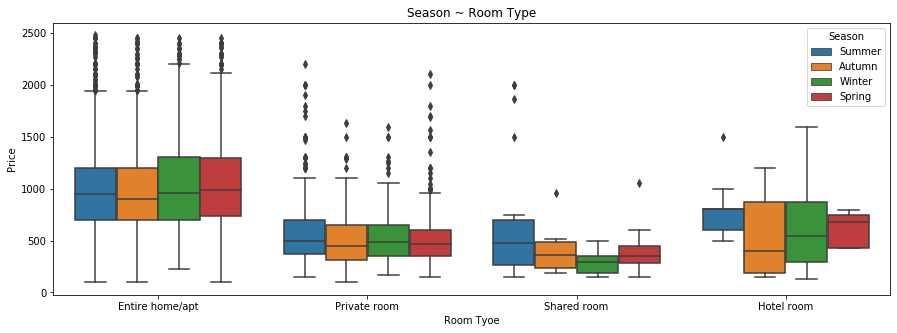

In [29]:
plt.figure(figsize=(15,5))
#sns.boxplot(x='Season', y ='price', data=df_new, hue='room_type')
sns.boxplot(x='room_type', y ='price', data=df_new, hue='Season')
plt.xlabel("Room Tyoe")
plt.ylabel("Price")
plt.title("Season ~ Room Type")

Text(0.5, 1.0, 'Square Feet ~ Price ~ Season')

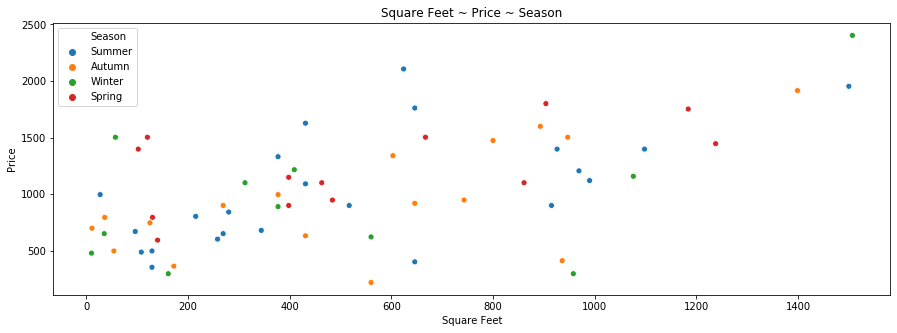

In [31]:
plt.figure(figsize=(15,5))
#sns.boxplot(x='Season', y ='price', data=df_new, hue='room_type')
sns.scatterplot(x='square_feet', y ='price', data=df_new[df_new['square_feet']>0], hue='Season')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Square Feet ~ Price ~ Season")

Text(0.5, 1, 'Square Feet ~ Price ~ Season')

<Figure size 1080x1080 with 0 Axes>

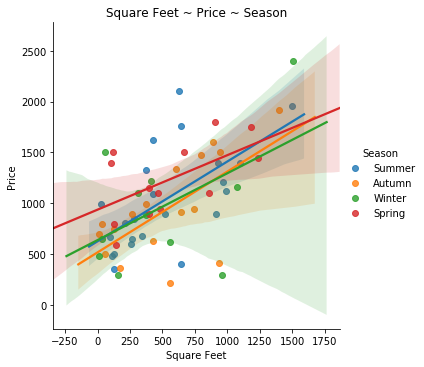

In [32]:
plt.figure(figsize=(15,15))
sns.lmplot(x='square_feet', y ='price', data=df_new[df_new['square_feet']>0], hue='Season')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Square Feet ~ Price ~ Season")

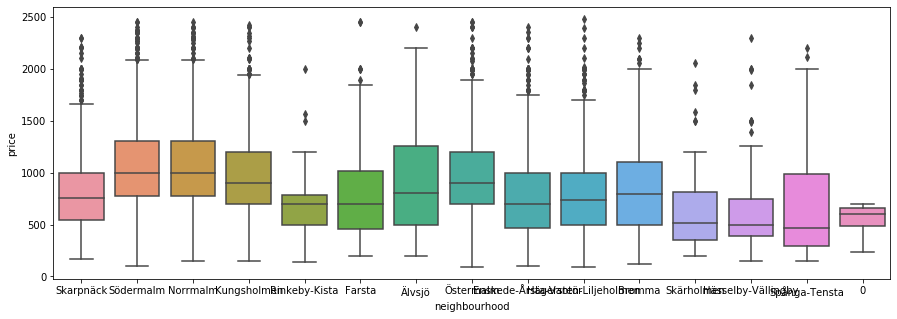

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(x='neighbourhood', y ='price', data=df_new)

Higher outlier in data observed for Room Type (Entire Home / apt and Private room) as compared to shared room and hotel room. Average price of Entire Home / apt and Private room in all season is very close, weras in regards to Shared room and Hotel room, we can observe season has an impact of proce

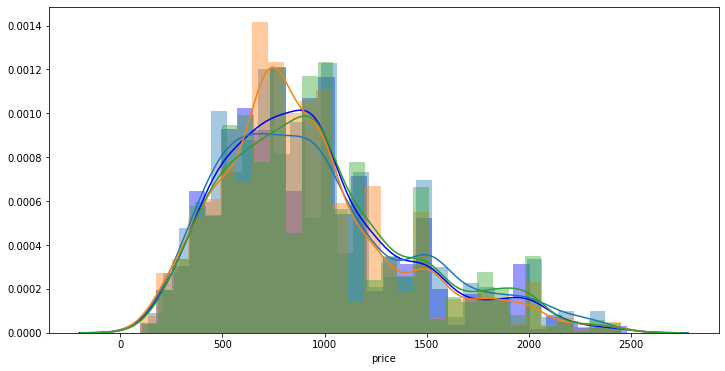

In [34]:

Summer = df_new[df_new['Season']=='Summer']['price'] 
Winter = df_new[df_new['Season']=='Winter']['price'] 
Autumn = df_new[df_new['Season']=='Autumn']['price'] 
Spring = df_new[df_new['Season']=='Spring']['price'] 

plt.figure(figsize=(12,6))
sns.distplot(Summer, bins=30, color='blue')
sns.distplot(Winter, bins=30)
sns.distplot(Autumn, bins=30)
sns.distplot(Spring, bins=30)

In [35]:
df_new.columns

Index(['room_type', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'name',
       'host_since', 'host_response_time', 'property_type',
       'review_scores_value', 'square_feet', 'cancellation_policy',
       'host_is_superhost', 'neighbourhood', 'instant_bookable', 'Year',
       'Month', 'day', 'weekday', 'weekday_name', 'Season'],
      dtype='object')

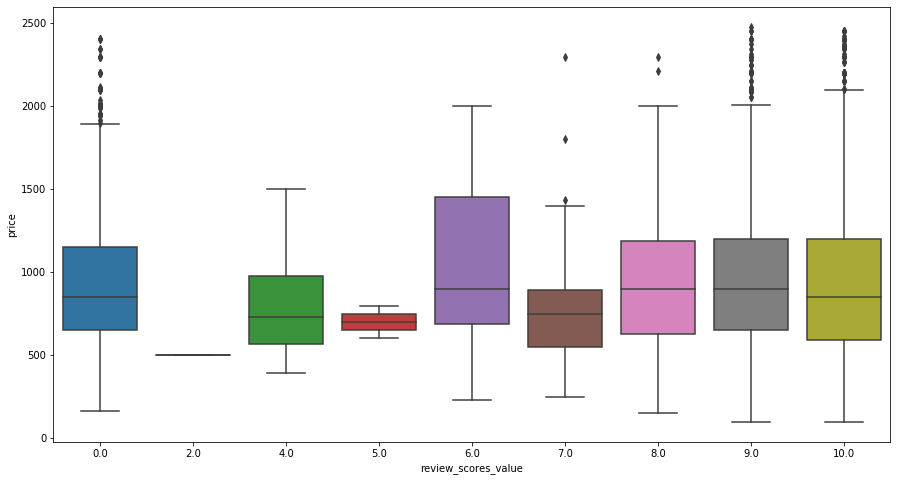

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot(x='review_scores_value', y ='price', data=df_new)

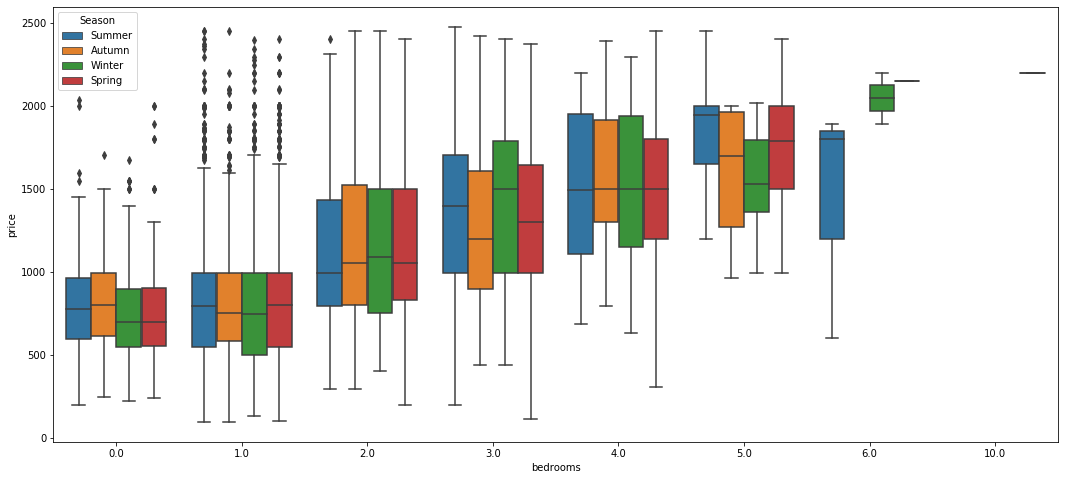

In [42]:
plt.figure(figsize=(18,8))
sns.boxplot(x='bedrooms', y ='price', data=df_new, hue='Season')

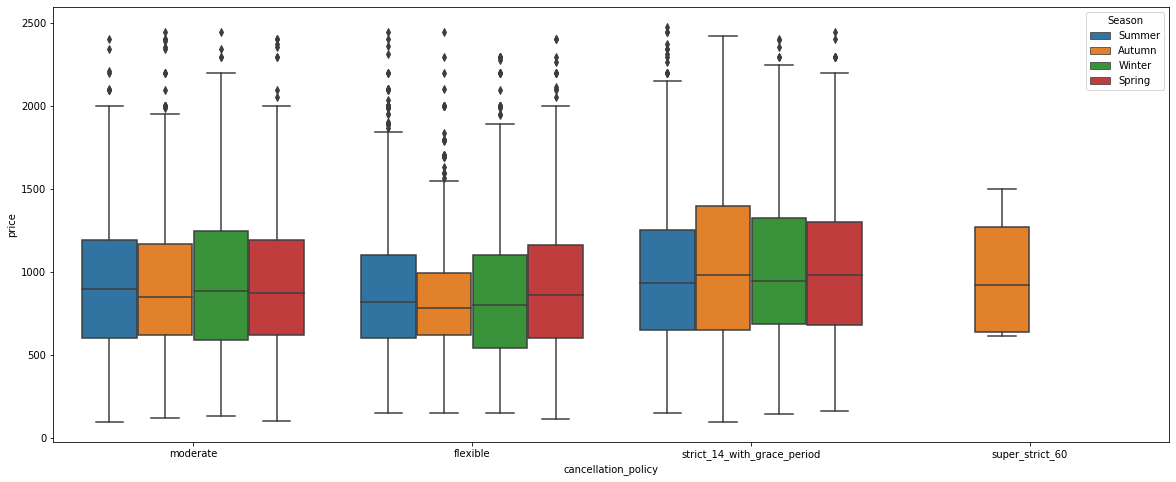

In [49]:
plt.figure(figsize=(20,8))
sns.boxplot(x='cancellation_policy', y ='price', data=df_new, hue='Season')

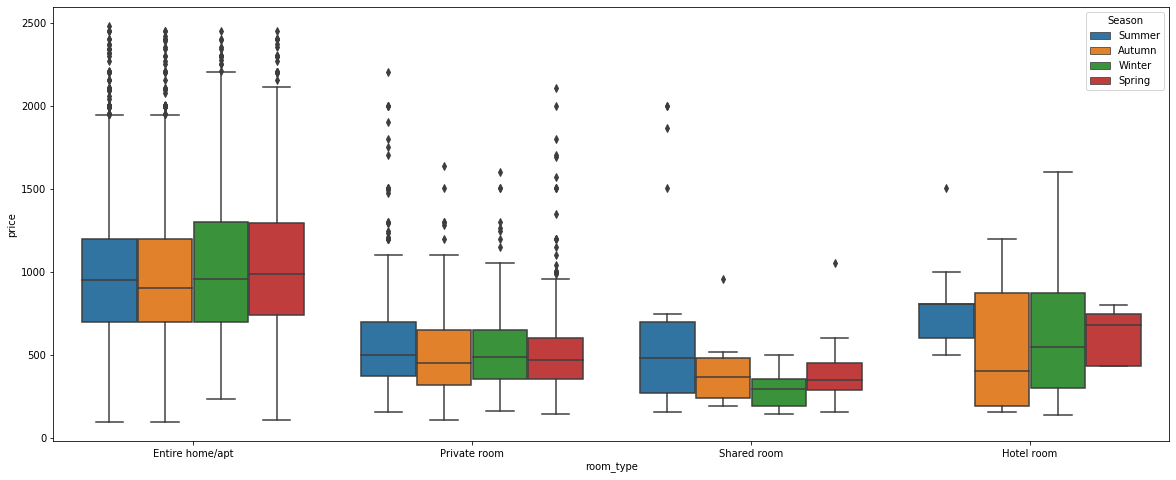

In [45]:
plt.figure(figsize=(20,8))
sns.boxplot(x='room_type', y ='price', data=df_new, hue='Season')

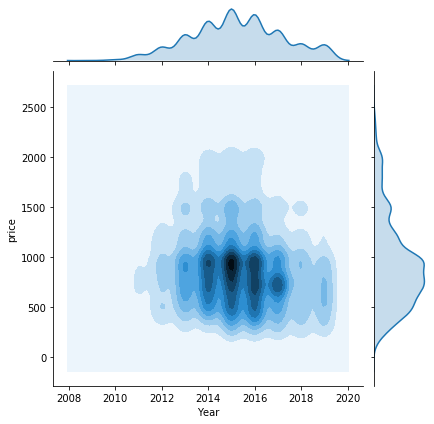

In [48]:
sns.jointplot(x='Year', y ='price', data=df_new, kind='kde')

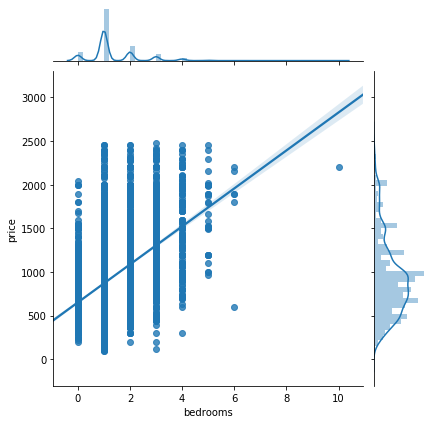

In [50]:
sns.jointplot(x='bedrooms', y ='price', data=df_new, kind='reg')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

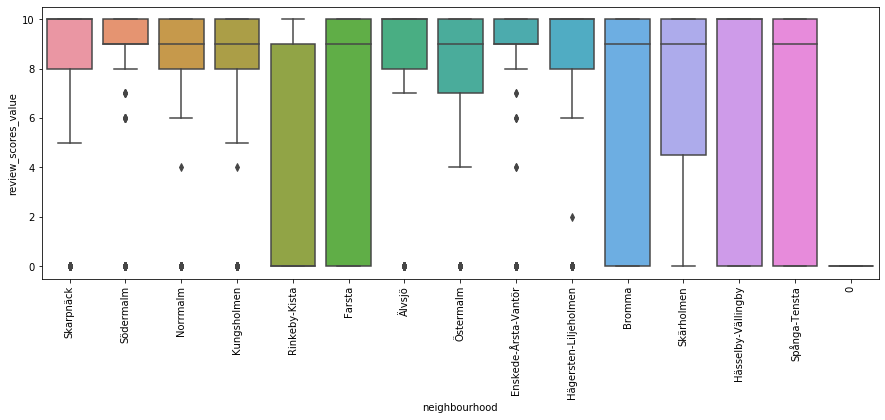

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(x='neighbourhood', y ='review_scores_value', data=df_new)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

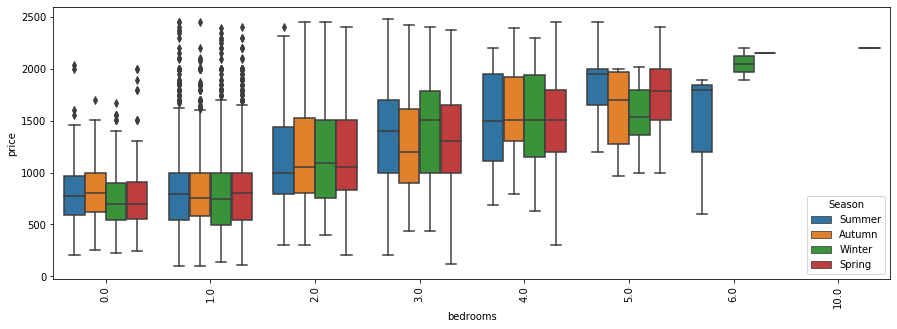

In [58]:
plt.figure(figsize=(15,5))
sns.boxplot(x='bedrooms', y ='price', data=df_new, hue='Season')
plt.xticks(rotation=90)

In [59]:
df_new.head(1)

,room_type,accommodates,bedrooms,bathrooms,price,name,host_since,host_response_time,property_type,review_scores_value,...,cancellation_policy,host_is_superhost,neighbourhood,instant_bookable,Year,Month,day,weekday,weekday_name,Season
0,Entire home/apt,3,2.0,1.0,1197.0,"Stockholm, new spacoius villa",2011-06-26,within a few hours,House,0.0,...,moderate,0,Skarpnäck,0,2011.0,6.0,26.0,6.0,Sunday,Summer


In [60]:
room_type = pd.get_dummies(df_new['room_type'], dummy_na=False, drop_first=True)
host_response_time = pd.get_dummies(df_new['host_response_time'], dummy_na=False, drop_first=True)
property_type = pd.get_dummies(df_new['property_type'], dummy_na=False, drop_first=True)
cancellation_policy = pd.get_dummies(df_new['cancellation_policy'], dummy_na=False, drop_first=True)
neighbourhood = pd.get_dummies(df_new['neighbourhood'], dummy_na=False, drop_first=True)
season = pd.get_dummies(df_new['Season'], dummy_na=False, drop_first=True)

In [61]:
df_new.columns

Index(['room_type', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'name',
       'host_since', 'host_response_time', 'property_type',
       'review_scores_value', 'square_feet', 'cancellation_policy',
       'host_is_superhost', 'neighbourhood', 'instant_bookable', 'Year',
       'Month', 'day', 'weekday', 'weekday_name', 'Season'],
      dtype='object')

In [62]:
df_new.corr()

,accommodates,bedrooms,bathrooms,price,review_scores_value,square_feet,host_is_superhost,instant_bookable,Year,Month,day,weekday
accommodates,1.000000,0.699779,0.407998,0.491181,0.039852,0.033470,-0.053011,-0.010423,-0.025042,-0.059076,-0.014344,0.015894
bedrooms,0.699779,1.000000,0.535235,0.446490,0.004672,0.034367,-0.076724,-0.038389,-0.055106,-0.073962,-0.015703,0.020471
bathrooms,0.407998,0.535235,1.000000,0.263070,0.018025,0.032669,0.010543,0.000584,-0.007409,-0.046015,-0.011889,0.010984
price,0.491181,0.446490,0.263070,1.000000,0.003087,0.051084,-0.059818,-0.088363,-0.090655,-0.034704,-0.011051,-0.018219
review_scores_value,0.039852,0.004672,0.018025,0.003087,1.000000,0.034502,0.183968,-0.069963,-0.082796,-0.067476,-0.020209,-0.032134
square_feet,0.033470,0.034367,0.032669,0.051084,0.034502,1.000000,0.041073,-0.021500,-0.118705,0.038437,-0.000244,-0.012742
host_is_superhost,-0.053011,-0.076724,0.010543,-0.059818,0.183968,0.041073,1.000000,0.070715,-0.046015,0.008239,0.016488,0.031953
instant_bookable,-0.010423,-0.038389,0.000584,-0.088363,-0.069963,-0.021500,0.070715,1.000000,0.288331,0.050023,0.006236,0.055669
Year,-0.025042,-0.055106,-0.007409,-0.090655,-0.082796,-0.118705,-0.046015,0.288331,1.000000,-0.125072,-0.018009,0.037256
Month,-0.059076,-0.073962,-0.046015,-0.034704,-0.067476,0.038437,0.008239,0.050023,-0.125072,1.000000,0.010081,0.014187


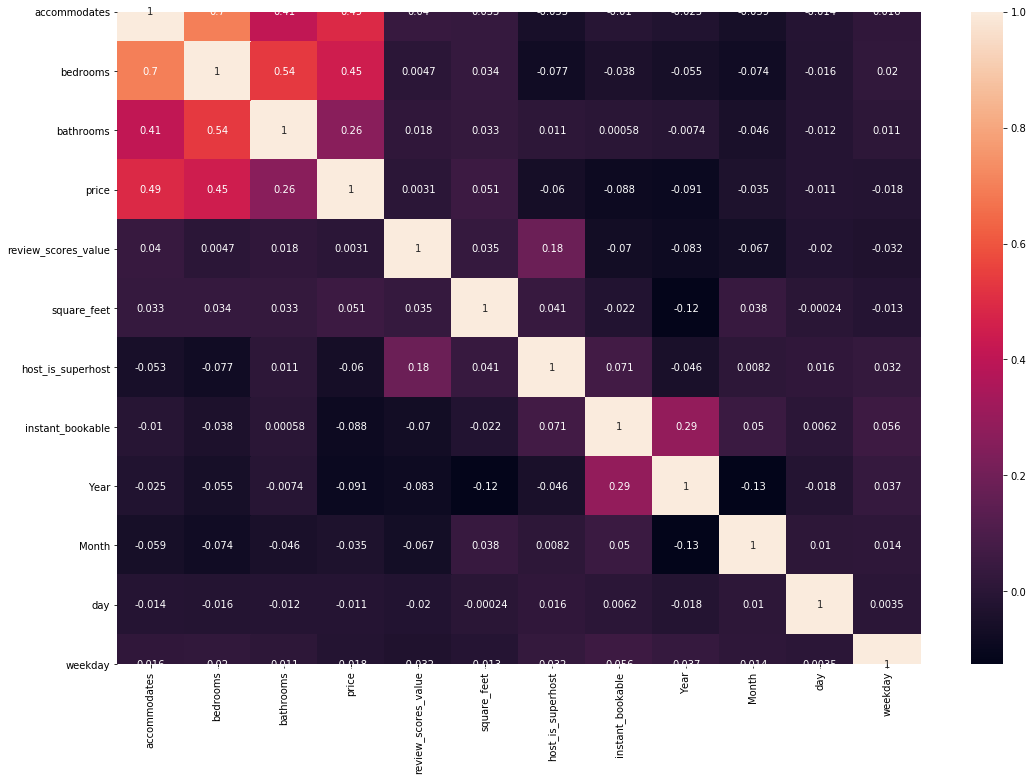

In [63]:
plt.figure(figsize=(18,12))
sns.heatmap(df_new.corr(), annot=True)

In [64]:
df_new = pd.concat([df_new, room_type, host_response_time, 
                    property_type, cancellation_policy, neighbourhood, season],axis=1)

In [65]:
df_new.drop(['room_type', 'host_response_time', 
        'property_type', 'cancellation_policy','neighbourhood','Season'],axis=1,inplace=True) #neighbourhood

In [66]:
df_new.head(1)

,accommodates,bedrooms,bathrooms,price,name,host_since,review_scores_value,square_feet,host_is_superhost,instant_bookable,...,Rinkeby-Kista,Skarpnäck,Skärholmen,Spånga-Tensta,Södermalm,Älvsjö,Östermalm,Spring,Summer,Winter
0,3,2.0,1.0,1197.0,"Stockholm, new spacoius villa",2011-06-26,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Modeling

In [68]:
# Linear model regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
df_new.columns

Index(['accommodates', 'bedrooms', 'bathrooms', 'price', 'name', 'host_since',
       'review_scores_value', 'square_feet', 'host_is_superhost',
       'instant_bookable', 'Year', 'Month', 'day', 'weekday', 'weekday_name',
       'Hotel room', 'Private room', 'Shared room', 'a few days or more',
       'within a day', 'within a few hours', 'within an hour', 'Apartment',
       'Bed and breakfast', 'Boat', 'Boutique hotel', 'Cabin', 'Camper/RV',
       'Condominium', 'Cottage', 'Earth house', 'Farm stay', 'Guest suite',
       'Guesthouse', 'Hostel', 'Hotel', 'House', 'Houseboat', 'In-law', 'Loft',
       'Nature lodge', 'Other', 'Serviced apartment', 'Tiny house',
       'Townhouse', 'Treehouse', 'Villa', 'moderate',
       'strict_14_with_grace_period', 'super_strict_60', 'Bromma',
       'Enskede-Årsta-Vantör', 'Farsta', 'Hägersten-Liljeholmen',
       'Hässelby-Vällingby', 'Kungsholmen', 'Norrmalm', 'Rinkeby-Kista',
       'Skarpnäck', 'Skärholmen', 'Spånga-Tensta', 'Södermalm', 'Äl

In [130]:

X = df_new[['accommodates', 'bedrooms', 'bathrooms', 
       'review_scores_value', 'square_feet', 'host_is_superhost',
       'instant_bookable', 'Year', 'Month', 'day', 'weekday',
       'Hotel room', 'Private room', 'Shared room', 'a few days or more',
       'within a day', 'within a few hours', 'within an hour', 'Apartment',
       'Bed and breakfast', 'Boat', 'Boutique hotel', 'Cabin', 'Camper/RV',
       'Condominium', 'Cottage', 'Earth house', 'Farm stay', 'Guest suite',
       'Guesthouse', 'Hostel', 'Hotel', 'House', 'Houseboat', 'In-law', 'Loft',
       'Nature lodge', 'Other', 'Serviced apartment', 'Tiny house',
       'Townhouse', 'Treehouse', 'Villa', 'moderate',
       'strict_14_with_grace_period', 'super_strict_60', 'Bromma',
       'Enskede-Årsta-Vantör', 'Farsta', 'Hägersten-Liljeholmen',
       'Hässelby-Vällingby', 'Kungsholmen', 'Norrmalm', 'Rinkeby-Kista',
       'Skarpnäck', 'Skärholmen', 'Spånga-Tensta', 'Södermalm', 'Älvsjö',
       'Östermalm', 'Spring', 'Summer', 'Winter']]

y = df_new['price']


In [131]:
X.head(3)

,accommodates,bedrooms,bathrooms,review_scores_value,square_feet,host_is_superhost,instant_bookable,Year,Month,day,...,Rinkeby-Kista,Skarpnäck,Skärholmen,Spånga-Tensta,Södermalm,Älvsjö,Östermalm,Spring,Summer,Winter
0,3,2.0,1.0,0.0,0.0,0,0,2011.0,6.0,26.0,...,0,1,0,0,0,0,0,0,1,0
2,2,1.0,1.0,10.0,0.0,1,1,2011.0,7.0,6.0,...,0,0,0,0,1,0,0,0,1,0
3,2,1.0,1.0,10.0,96.0,0,0,2011.0,8.0,26.0,...,0,0,0,0,1,0,0,0,1,0


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [133]:
lm = LinearRegression()

In [134]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
print(lm.coef_)

[ 7.28080156e+01  1.29073862e+02  7.47688340e+01 -5.52008716e+00
  3.73326591e-02 -2.03106615e+00 -1.46715803e+01  2.07765501e+00
  1.15746426e+00 -2.65884673e-01 -4.04728686e+00  1.52469305e+02
 -2.77231351e+02 -2.71567029e+02  5.69832066e+01  6.66692708e+01
  8.78557767e+01  1.66527094e+01 -5.83577057e+02 -5.38269434e+02
 -6.22025421e+02  1.44602209e+02 -3.94460071e+02 -6.91141457e+02
 -5.04525995e+02  2.49045229e-11 -9.00880426e+02  1.18099039e+02
 -7.20665949e+02 -5.74254917e+02 -1.66526761e+03 -8.43060186e+02
 -4.65226955e+02  1.13501214e+02 -8.23494646e+02 -3.05162674e+02
 -9.31327259e+02 -2.97130856e+02 -5.74608910e+02 -2.55543619e+02
 -5.45195642e+02  1.70530257e-13 -5.68481484e+02  8.13186232e+00
  4.72703160e+01 -1.60927758e+02 -2.99048549e+01 -3.11742801e+00
 -1.04554100e+02  1.14774349e+01 -1.51732051e+02  2.43660467e+02
  3.42509950e+02 -2.50068297e+01  1.48595883e+01 -1.25228392e+02
 -1.80691075e+02  3.45081327e+02 -1.88205286e+00  3.04932425e+02
  5.15406662e+00 -3.53629

In [136]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [137]:
cdf

,Coeff
accommodates,72.808016
bedrooms,129.073862
bathrooms,74.768834
review_scores_value,-5.520087
square_feet,0.037333
...,...
Älvsjö,-1.882053
Östermalm,304.932425
Spring,5.154067
Summer,-3.536299


In [138]:
prediction = lm.predict(X_test)

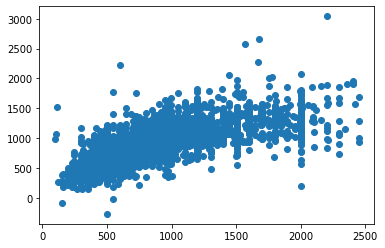

In [139]:
plt.scatter(y_test, prediction)

In [140]:
from sklearn import metrics

In [141]:
metrics.mean_absolute_error(y_test, prediction)

246.2719946744314

In [142]:
metrics.mean_squared_error(y_test, prediction)

110720.5767163083

In [143]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))

332.74701608926307

In [144]:
metrics.explained_variance_score(y_test, prediction)

0.44769617523869787

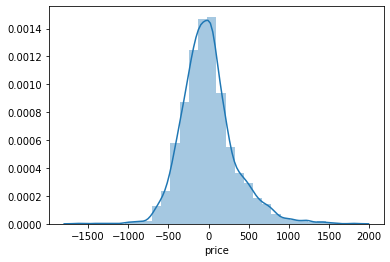

In [145]:
sns.distplot(y_test-prediction, bins=30)

In [146]:
cdf

,Coeff
accommodates,72.808016
bedrooms,129.073862
bathrooms,74.768834
review_scores_value,-5.520087
square_feet,0.037333
...,...
Älvsjö,-1.882053
Östermalm,304.932425
Spring,5.154067
Summer,-3.536299
